![Titanic](assets/Titanic.jpg "Titanic")

# Titanic Dataset solution

**This dataset provides the review of useful techniques applicable for most commonly faced DS tasks**

The dataset was originally downloaded from kaggle.com/competitions where the data is provided. There is also located the code of other users to which I will reference in this notebook. Not only the dataset was downloaded from kaggle, many approaches that I use here were studied from kaggle courses. So, in my opinion, you should definetely check this site out, if you want to broad your knowledge in data analysis whatever your needs are.



### Firstly, we have to see how our data looks like
In the cell below, I will import all necessary libraries for visualisations, such as seaborn(graphs) and pandas(dataframes)

In [423]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data/train.csv', index_col=0)
test = pd.read_csv('data/test.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**And from a statistaical point of view**

In [424]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [425]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


We can see that Name and Ticket are mostly unique, so that means they don't correlate with Survived column

In [426]:
df.drop(['Name', 'Ticket'], inplace=True,axis=1)
test.drop(['Name', 'Ticket'], inplace=True,axis=1)

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


The target, y in our point of view, will definitely be Survived column. Also in a table we can see several NaN values, which we have to replace or drop

**Let's check how much of NaN's each column has in %**

In [428]:
pd.Series({x: df[df[x].isna()].shape[0]/df.shape[0] for x in df.columns})

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

**Here we can see three columns with NaN's that are Age, Cabin and Emabrked**

Some statements made on presented data
- NaN's in Age means data is missing
- NaN's in Cabin means that the person was not in a Cabin
- NaN's in Embarked might mean both: that the person wasn't a passenger or the data is missing

**Let's chnage NaN's to "Not a Cabin" in Cabin column**

In [429]:
df['Cabin'].replace(np.nan, 'No Cabin', inplace=True)
test['Cabin'].replace(np.nan, 'No Cabin', inplace=True)

And look at the dataset now

In [430]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,No Cabin,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,No Cabin,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,No Cabin,S


**Now let's replace NaN's in Embarked via the same method, but using the mode of Embarked**

In [431]:
df['Embarked'].replace(np.nan, df['Embarked'].mode()[0], inplace=True)
test['Embarked'].replace(np.nan, test['Embarked'].mode()[0], inplace=True)

Quick reference to changed dataset

In [432]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,No Cabin,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,No Cabin,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,No Cabin,S


**Last, but not least**

We have to change Age column. I will use the sklearn's imputer for it, more precisely the mean imputer method of simple imputer

In [433]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df['Age'].values.reshape(-1,1))
test['Age'] = imputer.transform(test['Age'].values.reshape(-1,1))

And a quick glance

In [434]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,No Cabin,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,No Cabin,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,No Cabin,S


## Now we must have deleted all NaN's

Let's quickly check it

In [435]:
df[df[[x for x in df.columns]].isna().any(1)].shape[0]

0

Exactly, we don't have any missing values

Let's divide dataset to features and target before we start feature enginering

In [436]:
X = df.iloc[:,1:].copy()
y = df.iloc[:,0].copy()


Features (X)

In [437]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,No Cabin,S
2,1,female,38.0,1,0,71.2833,C85,C
3,3,female,26.0,0,0,7.9250,No Cabin,S
4,1,female,35.0,1,0,53.1000,C123,S
5,3,male,35.0,0,0,8.0500,No Cabin,S


Target (y)

In [438]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

## Now we have to explore data in more depth each column

Let's start with graphs

In [439]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

**Pclass**

Distribution

<AxesSubplot:ylabel='Pclass'>

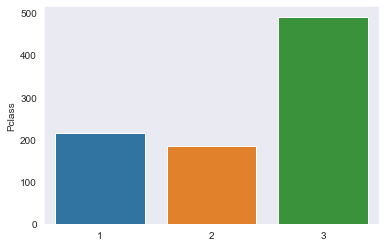

In [440]:
sns.barplot(x=X['Pclass'].value_counts().index, y=X['Pclass'].value_counts())

Correlation with target

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

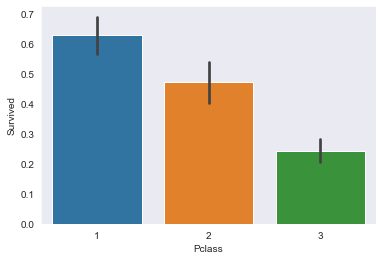

In [441]:
sns.barplot(x=df['Pclass'], y=y) 

**Sex**

Distribution

<AxesSubplot:ylabel='Sex'>

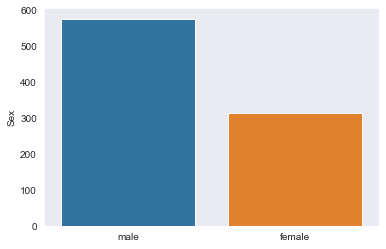

In [442]:
sns.barplot(x=X['Sex'].value_counts().index, y=X['Sex'].value_counts())

Correlation with target

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

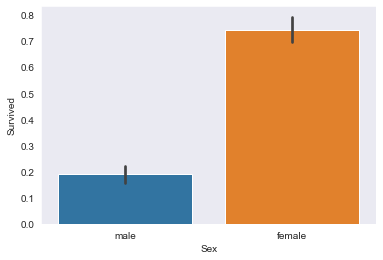

In [443]:
sns.barplot(x=X['Sex'],y=y)

**Class and sex correlation**

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

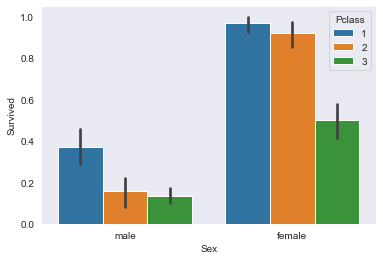

In [444]:
sns.barplot(x=X['Sex'], y=y, hue=X['Pclass'])

**Age**

Distribution

<AxesSubplot:xlabel='Age', ylabel='Density'>

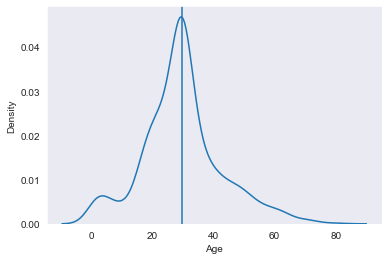

In [445]:
plt.axvline(X['Age'].mean())
sns.kdeplot(data=X['Age'])

No skewness seen

The distribution of age of survived people

<AxesSubplot:xlabel='Age', ylabel='Density'>

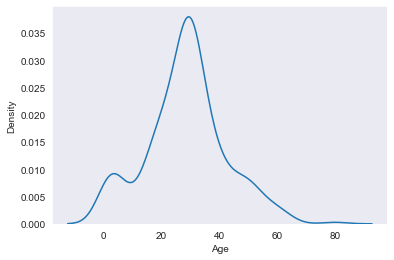

In [446]:
sns.kdeplot(data=df.loc[df.Survived==1, 'Age'])

The distribution of age of died people

<AxesSubplot:xlabel='Age', ylabel='Density'>

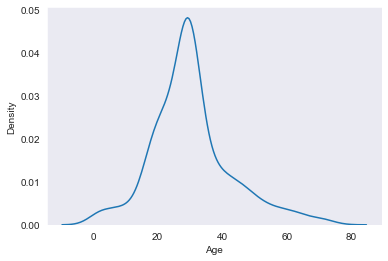

In [447]:
sns.kdeplot(data=df.loc[df.Survived==0, 'Age'])

**SibSp**

distribution

<AxesSubplot:ylabel='SibSp'>

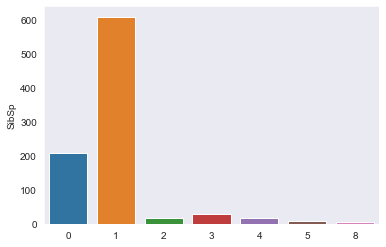

In [448]:
sns.barplot(x=X['SibSp'].unique(),y=X['SibSp'].value_counts())

Correlation

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

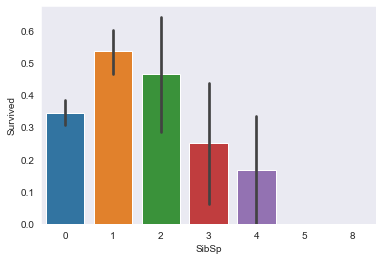

In [449]:
sns.barplot(x=X['SibSp'],y=y)

**Parch**

Distribution

<AxesSubplot:ylabel='Parch'>

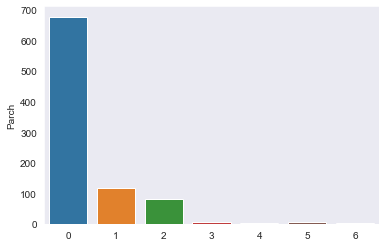

In [450]:
sns.barplot(x=X['Parch'].unique(), y=X['Parch'].value_counts())

Correlation

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

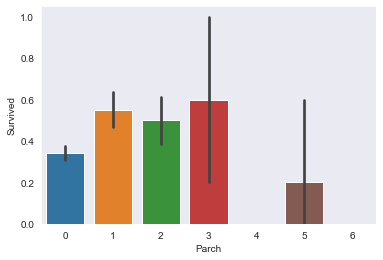

In [451]:
sns.barplot(x=X['Parch'],y=y)

**Fare**

<AxesSubplot:xlabel='Fare', ylabel='Density'>

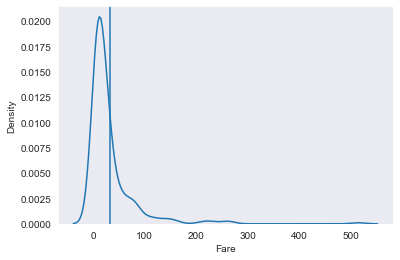

In [452]:
plt.axvline(X.Fare.mean())
sns.kdeplot(data=X['Fare'])

Positive skew, so the way to fix this is to take a LN out of Fare

<AxesSubplot:xlabel='Fare', ylabel='Density'>

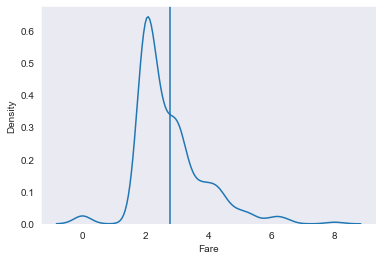

In [453]:
plt.axvline(np.cbrt(X['Fare']).mean())
sns.kdeplot(data=np.cbrt(X['Fare']))

That hasn't fixed out problem, so let's try min-max

<AxesSubplot:ylabel='Density'>

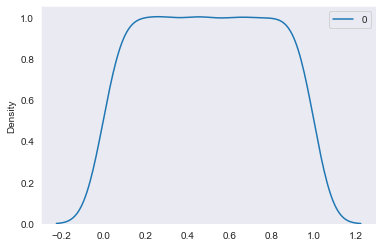

In [454]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
sns.kdeplot(data=qt.fit_transform(X['Fare'].values.reshape(-1,1)))

The mean and the median are pretty close, so the quantile transform worked pretty well

In [455]:
X['Fare'] = qt.fit_transform(X['Fare'].values.reshape(-1,1))
test['Fare'] = qt.fit_transform(test['Fare'].values.reshape(-1,1))
X['Fare']

PassengerId
1      0.084831
2      0.885393
3      0.259551
4      0.838764
5      0.295506
         ...   
887    0.456180
888    0.733708
889    0.612360
890    0.733708
891    0.137640
Name: Fare, Length: 891, dtype: float64

**Embarked**

Distribution

<AxesSubplot:ylabel='Embarked'>

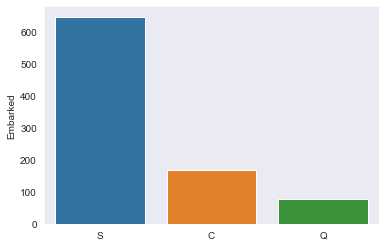

In [456]:
sns.barplot(x=X['Embarked'].unique(), y=X['Embarked'].value_counts())

Correlation

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

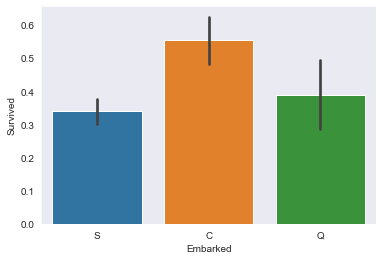

In [457]:
sns.barplot(x=X['Embarked'], y=y)

## Categorical encoding

Here we will encode our categorical features in order to make them comprehensible for ml algorithms

In [458]:
from sklearn.preprocessing import OrdinalEncoder
cat_cols = [x for x in X.columns if X[x].dtype == 'object']
encoder = OrdinalEncoder()
X[cat_cols] = encoder.fit_transform(X[cat_cols])
test[cat_cols] = encoder.fit_transform(test[cat_cols])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,1.0,22.0,1,0,0.084831,146.0,2.0
2,1,0.0,38.0,1,0,0.885393,81.0,0.0
3,3,0.0,26.0,0,0,0.259551,146.0,2.0
4,1,0.0,35.0,1,0,0.838764,55.0,2.0
5,3,1.0,35.0,0,0,0.295506,146.0,2.0


## Heatmap

<AxesSubplot:>

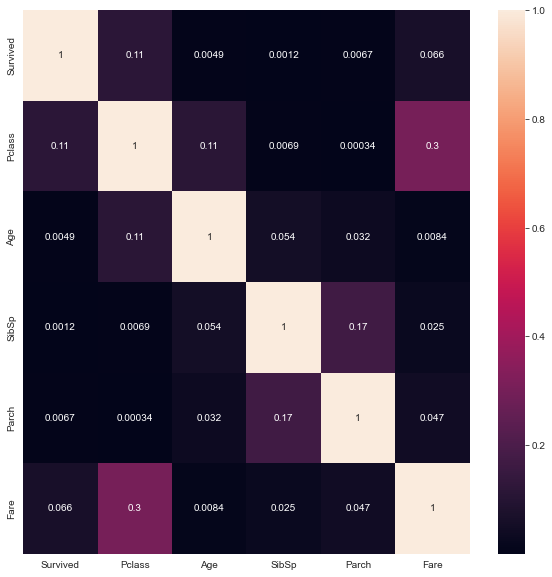

In [459]:
plt.figure(figsize=(10,10))
sns.heatmap(data=np.power(df.corr(), 2), annot=True)

The only additional feature that we will create will be Pclass/Fare

In [460]:
X['ClassFare_ratio'] = X['Pclass']*X['Fare']
test['ClassFare_ratio'] = test['Pclass']*test['Fare']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ClassFare_ratio
PassengerId,,,,,,,,,
1,3,1.0,22.0,1,0,0.084831,146.0,2.0,0.254494
2,1,0.0,38.0,1,0,0.885393,81.0,0.0,0.885393
3,3,0.0,26.0,0,0,0.259551,146.0,2.0,0.778652
4,1,0.0,35.0,1,0,0.838764,55.0,2.0,0.838764
5,3,1.0,35.0,0,0,0.295506,146.0,2.0,0.886517


# ML process

Firstly, we will have to define the cross validation function

In [461]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def score(model):
    return round(np.mean(cross_val_score(model, X, y, scoring='accuracy', cv=5))*100,2)


Then let's import models

In [462]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
acc_logreg = score(logreg)
acc_logreg

78.56

In [463]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
acc_knn = score(knn)
acc_knn

75.99

In [464]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
acc_gaussian = score(gaussian)
acc_gaussian

75.32

In [465]:
from sklearn.svm import SVC
svc = SVC()
acc_svc = score(svc)
acc_svc

67.79

In [466]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
acc_ridge = score(ridge)
acc_ridge

78.79

In [467]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
acc_perceptron = score(perceptron)
acc_perceptron

52.29

In [468]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
acc_sgd = score(sgd)
acc_sgd

66.33

In [469]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
acc_tree = score(tree)
acc_tree

78.45

In [470]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
acc_forest = score(forest)
acc_forest

81.71

In [471]:
from sklearn.gaussian_process import GaussianProcessClassifier
gaus_class = GaussianProcessClassifier()
acc_gaus_class = score(gaus_class)
acc_gaus_class

76.55

In [472]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNeighboursClassifier', 'GaussianNB', 'SVC',
    'RidgeClassifier', 'Perceptron', 'SGDClassifier', 'Tree', 'Forest', 'Gaussian Process'],
    'Score': [acc_logreg, acc_knn, acc_gaussian,acc_svc, acc_ridge,acc_perceptron, acc_sgd,
     acc_tree, acc_forest, acc_gaus_class ]
})
models

,Model,Score
0,Logistic Regression,78.56
1,KNeighboursClassifier,75.99
2,GaussianNB,75.32
3,SVC,67.79
4,RidgeClassifier,78.79
5,Perceptron,52.29
6,SGDClassifier,66.33
7,Tree,78.45
8,Forest,81.71
9,Gaussian Process,76.55


**Statement**

We can clearly see that Forest model has performed better than others, so we will chose it as our model

In [473]:
model = RandomForestClassifier()
model.fit(X,y)


RandomForestClassifier()

Now, when we have trained an output model, we can make predictions for a test file

In [483]:
predictions = pd.DataFrame(model.predict(test.fillna(0.0)),index=test.index)
predictions.head()

,0
PassengerId,
892,0
893,0
894,0
895,1
896,1


And export it as csv

In [484]:
predictions.to_csv('data/predictions.csv')

**Thank you very much for reading!**